# 🔥 Wildfire Prediction ML Project

### Objective
Develop a machine learning model to predict the potential extent (size or perimeter) of wildfires using historical data and environmental features such as fuel type, topography, drought indices, and weather conditions.

---

### 🧭 Project Pipeline Overview
```yaml
Wildfire Prediction ML Project Pipeline:
  - Data Acquisition:
      Description: >
        Collect datasets related to wildfires, including ignition points, weather, drought indices,
        topography, roads, and land use/land cover (LULC).
      External Data Sources:
        - Alaska Fire Dataset
        - Weather (Temperature, Humidity, Wind)
        - Drought Index (KBDI, SPI)
        - Roads & Urban Areas
        - Land Use / Land Cover (LULC)

  - Data Preprocessing:
      Description: >
        Clean missing values, unify coordinate systems, calculate derived spatial features,
        and merge datasets by spatial and temporal keys.

  - Exploratory Data Analysis (EDA):
      Description: >
        Visualize spatial and statistical relationships between fire size and environmental factors.
      Visualizations:
        - Fire ignition map (Folium)
        - Fire size vs Fuel Type (Boxplot)
        - Correlation heatmap among numerical variables

  - Modeling:
      Description: >
        Build and compare three predictive modeling approaches for wildfire size:
          1. Linear & Polynomial Regression (degree 2 and 4)
          2. Manual binning into Small / Medium / Large categories + Classification
          3. K-Means clustering-based classification

  - Evaluation & Visualization:
      Description: >
        Evaluate model performance and visualize results using appropriate regression and classification metrics.
      Metrics:
        - Regression: RMSE, MAE, R²
        - Classification: Accuracy, F1-score, Confusion Matrix

  - Report & Insights:
      Description: >
        Summarize findings, identify influential environmental variables,
        and propose future directions for improving wildfire prediction accuracy.


## 📋 Project Summary Table
| **Stage** | **Name**                            | **Main Objective**                                       | **Key Tasks**                                                               | **Outputs**                      |
| --------- | ----------------------------------- | -------------------------------------------------------- | --------------------------------------------------------------------------- | -------------------------------- |
| **1**     | **Data Acquisition**                | Gather all wildfire-related datasets.                    | Download fire, weather, drought, roads, and land cover data.                | Raw `.csv`, `.shp`, `.tif` files |
| **2**     | **Data Preprocessing**              | Clean and merge data across space and time.              | Handle missing data, compute features (slope, aspect, distance), unify CRS. | Cleaned integrated dataset       |
| **3**     | **Exploratory Data Analysis (EDA)** | Explore relationships between fire size and environment. | Map visualization, boxplots, correlation heatmaps.                          | EDA visuals & findings           |
| **4**     | **Modeling**                        | Build regression and classification models.              | Regression, Manual binning, and K-Means classification models.              | Trained models                   |
| **5**     | **Evaluation & Visualization**      | Assess model accuracy and visualize predictions.         | Compute RMSE, MAE, R², F1-score, Confusion Matrix.                          | Performance metrics & plots      |
| **6**     | **Report & Insights**               | Summarize results and key factors.                       | Interpret model outcomes, discuss influential features.                     | Final report and notebooks       |


## ✅ Our Modeling Plan — Overview

| **#** | **Approach** | **Type** | **Features** | **Labels** | **Models** | **Evaluation Metrics** |
|:------:|:-------------|:----------|:--------------|:------------|:-------------|:-------------------------|
| **1** | **Regression** | Continuous Prediction | Fuel Type + Topography | Fire Size (acres) | Linear Regression + Polynomial (deg 2 & 4) | RMSE, MAE, R² |
| **2** | **Manual Binning Classification** | Supervised Classification | Fuel Type + Topography | Manually labeled as Small / Medium / Large | Linear + Polynomial (deg 2 & 4) + Neural Network | Accuracy, F1-score, Confusion Matrix |
| **3** | **K-Means Classification** | Semi-supervised Classification | Fuel Type + Topography | Automatically clustered into Small / Medium / Large using K-Means | Linear + Polynomial (deg 2 & 4) + Neural Network | Accuracy, F1-score, Confusion Matrix |


## 🌤 External Data Sources — Priority and Suggested Features

| **Priority Level** | **Data Source** | **Description** | **Example Features** |
|:-------------------:|:----------------|:-----------------|:----------------------|
| ⭐️⭐️⭐️ **High Priority** | **Weather** (Temperature, Humidity, Wind Speed) | Directly influences fire ignition and spread. | `Temp`, `Humidity`, `WindSpeed` |
| ⭐️⭐️ **Medium Priority** | **Drought Index (KBDI / SPI)** | Represents vegetation dryness and soil moisture conditions. | `KBDI_Value`, `SPI` |
| ⭐️⭐️ **Medium Priority** | **Land Use / Land Cover (LULC)** | Describes surface types and human land activity. | `ForestCover`, `Urban`, `WaterBody` |
| ⭐️ **Low Priority** | **Road / Urban Distance** | Reflects human influence and proximity to infrastructure. | `Dist_to_Road`, `Dist_to_City` |
### 🔹 2. Recommended External Datasets and Integration Plan
These external datasets can be merged with the main Alaska fire dataset based on spatial and temporal proximity to enhance model performance.

### 🧩 Data Fusion Workflow Overview 

```yaml
Data Fusion Pipeline:
  Stage 1: Core Fire Dataset
    Description: >
      Base dataset containing wildfire ignition points and intrinsic features.
    File: AK_fire_location_points_NAD83.csv
    Key Features:
      - Fuel_Type
      - Topography (Slope, Elevation, Aspect)
      - Fire_Size
      - Latitude / Longitude
      - Ignition_Date

  Stage 2: External Data Integration
    Weather Data:
      Source: alaska_weather.csv
      Join Type: Temporal (nearest date)
      New Features:
        - Temperature
        - Humidity
        - WindSpeed
        - Precipitation
    Drought Index:
      Source: drought_kbdi.csv
      Join Type: Temporal (by date or month)
      New Features:
        - KBDI
        - SPI
    Roads / Urban Areas:
      Source: alaska_roads.shp
      Join Type: Spatial (nearest distance)
      New Features:
        - Distance_to_Road
        - Distance_to_Urban
    Land Cover:
      Source: lulc_alaska.tif
      Join Type: Raster Sampling
      New Features:
        - LandCover_Class
        - Vegetation_Type

  Stage 3: Unified Dataset
    Output File: fire_merged_dataset.csv
    Description: >
      Combined dataset with both intrinsic and environmental features.
    Feature Count: ~20–25 (depending on data availability)
    Ready For:
      - Regression (Approach #1)
      - Manual Classification (Approach #2)
      - K-Means Classification (Approach #3)

  Stage 4: Model Evaluation
    Regression Metrics:
      - RMSE
      - MAE
      - R²
    Classification Metrics:
      - Accuracy
      - F1-score
      - Confusion Matrix


# 🔥 Alaska Wildfire — Step-by-Step Data Refinement (from raw CSV)

**Goal:** Load the raw fire points CSV, inspect schema, standardize key columns (fuel & topography & fire size & time), engineer labels, and export a clean core dataset for Approaches #1–#3.



In [20]:
# 0. Imports & Config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict
from pathlib import Path

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 200)



## 1) Load CSV



In [21]:
RAW_PATH = Path("/Users/xuejunchen/Desktop/阿冈实验室/Data/AK_fire_location_points_NAD83.csv")

df = pd.read_csv(RAW_PATH)
df.head()



/var/folders/w4/0226z4g57m5062yqsrt25s6w0000gn/T/ipykernel_11742/3359120149.py:3: DtypeWarning: Columns (13,18,20,33,34,38,45,46,47,49,50,51,52,55,57,58,61,62,63,66,70,71,72,73,75,76,77,78,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(RAW_PATH)


,ID,NAME,FIRESEASON,FIRESEASONS,LASTUPDATETIME,MGMTORGID,MGMTOFFICEID,MGMTOPTIONID,PRESCRIBEDFIRE,LATITUDE,LONGITUDE,MAPNAME,MAPNUMBER,NEARESTWEATHERSTA,ORIGINOWNERID,ORIGINADMINUNITID,DISCOVERYDATETIME,DISCOVERYSIZE,IADATETIME,IASIZE,INITIALBEHAVIOR,CONTROLDATETIME,OUTDATE,ESTIMATEDTOTALACRES,ACTUALTOTALACRES,ESTIMATEDTOTALCOST,GENERALCAUSE,SPECIFICCAUSE,ORIGINSLOPE,ORIGINASPECT,ORIGINELEVATION,ORIGINTOWNSHIP,ORIGINRANGE,ORIGINSECTION,ORIGINQUARTER,ORIGINMERIDIAN,STRUCTURESTHREATENED,STRUCTURESBURNED,PRIMARYFUELTYPE,HARDCOPYREPORTAVAILABLE,TYPE1ASSIGNEDDATE,TYPE1RELEASEDDATE,TYPE2ASSIGNEDDATE,TYPE2RELEASEDDATE,AFSNUMBER,DOFNUMBER,USFSNUMBER,ADDITIONALNUMBER,FALSEALARM,FORCESITRPT,FORCESITRPTSTATUS,RECORDNUMBER,COMPLEX,IMPORT_NOTES,WFUFIRE,REPORTRECEIVEDDATE,ISCOMPLEX,CARRYOVER,STATEADSID,ORIGINAL_LATITUDE,ORIGINAL_LONGITUDE,IRWINID,SUPPRESSIONSTRATEGY,FIREMGMTCOMPLEXITY,ADSPERMISSIONSTATE,OWNERKIND,FIRECODEREQUESTED,ISREIMBURSABLE,ISFSASSISTED,ISTRESPASS,FIRECODENOTES,CONTAINMENTDATETIME,CONFLICTIRWINID,COMPLEXPARENTIRWINID,ISVALID,MERGEDINTO,MERGEDDATE,MERGED_REL_IRWINIRID,COMPLEX_REL_IRWINIRID,FIRECAUSE,ISQUARANTINED,CERTIFIED_IN_INFORM,WCE_INCIDENTID,MGMTOPTION_PROTDATE
0,70699,CRS GLENNALLEN FUELS BREAK RX,2024,2020 - 2029,1/2/2025 10:02:01,DOF,CRS,Critical,Y,62.091990,-145.572650,GULKANA A-4,NaN,NaN,BIA,AKAKA-Pending Native Allotments,11/22/2024 14:39:55,NaN,NaN,0.1,NaN,NaN,NaN,0.1,NaN,NaN,Undetermined,Undetermined,0-25,Flat,0501-1500,004N,002W,27,NaN,Copper River,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,62.091990,-145.572650,{52F6E186-2B9D-4E4A-9BE8-C09E8E442622},NaN,NaN,NaN,Federal,false,False,True,False,NaN,NaN,NaN,NaN,true,NaN,NaN,NaN,NaN,Undetermined,NaN,False,0868a5f7-fc18-4c0d-9eac-99ead46f8cb3,Critical
1,70698,CRS RX EFF FUELS SUPPORT,2024,2020 - 2029,1/2/2025 10:01:56,DOF,CRS,Critical,Y,62.091990,-145.500000,GULKANA A-3,NaN,NaN,ANCSA,"AKAHN-Ahtna, Incorporated",11/12/2024 09:31:16,NaN,NaN,0.1,NaN,NaN,NaN,0.1,NaN,NaN,Undetermined,Undetermined,0-25,Flat,0501-1500,004N,002W,25,NaN,Copper River,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,62.091990,-145.500000,{0166CC67-E12C-4179-AB66-CC23F31BB6F7},NaN,NaN,NaN,Private,false,False,True,False,NaN,NaN,NaN,NaN,true,NaN,NaN,NaN,NaN,Undetermined,NaN,False,99a340a9-148c-4afa-8563-74d06260709f,Critical
2,70697,Eielson Avenue,2024,2020 - 2029,12/31/2024 09:01:55,DOF,DAS,Critical,N,64.072975,-145.671352,BIG DELTA A-4,NaN,NaN,Private,AKPRI-Private,11/3/2024 15:55:17,0.1,NaN,0.5,NaN,11/4/2024 12:03:00,11/13/2024 12:45:00,0.5,NaN,0.0,Debris and open burning,Hand pile/slash,0-25,Flat,0501-1500,010S,011E,06,NaN,Fairbanks,0.0,0.0,BLACK SPRUCE,NaN,NaN,NaN,NaN,NaN,SB51,7341244024,PNSB51,NaN,N,NaN,NaN,440,NaN,NaN,NaN,NaN,N,NaN,NaN,64.078844,-145.663021,{F60A7F96-781F-4112-9606-2CC143F983A1},Monitor,NaN,DEFAULT,Private,false,False,True,False,NaN,11/4/2024 12:02:00,NaN,NaN,true,NaN,NaN,NaN,NaN,Human,False,True,b85c0a51-e7d3-4b44-a235-ec387686334d,Critical
3,70696,Denali Rx Fall,2024,2020 - 2029,10/31/2024 16:07:44,AFS,TAD,Critical,Y,63.733600,-148.897400,HEALY C-4,NaN,NaN,NPS,AKDEP-Denali National Park and Preserve,10/15/2024 15:48:56,NaN,NaN,0.1,NaN,NaN,NaN,15.4,NaN,0.0,Human,Human,0-25,Flat,1501-2500,014S,007W,03,NaN,Fairbanks,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,63.733600,-148.897400,{F2E208BD-257C-4376-A8B7-802891659072},NaN,NaN,NaN,Federal,false,False,False,False,NaN,NaN,NaN,NaN,true,NaN,NaN,NaN,NaN,Human,NaN,False,f8e3c5a1-f639-43e7-a3a2-7a7886bee7a3,Critical
4,70693,Billie June Road,2024,2020 - 2029,10/26/2024 09:58:14,DOF,DAS,Critical,N,63.956644,-145.480844,MT HAYES D-3,NaN,NaN,Private,AKPRI-Private,10/12/2024 22:42:56,0.1,NaN,0.1,NaN,10/13/2024 07:15:00,10/17/2024 12:20:00,0.1,NaN,0.0,Debris and open burning,Other land clearing,0-25,Flat,0501-1500,011S,012E,18,NaN,Fairbanks,0.0,0.0,MOSS/SPRUCE,NaN,NaN,NaN,NaN,NaN,R9XE,7341243924,PNR9XE,Na

## 2) Schema overview (dtypes, null ratios)


In [25]:
schema = pd.DataFrame({
    "column": df.columns,
    "dtype": [str(t) for t in df.dtypes],
    "non_null": df.notna().sum().values,
    "nulls": df.isna().sum().values
})
schema["null_pct"] = (schema["nulls"] / len(df) * 100).round(2)
schema.sort_values("null_pct").head(20)

    

,column,dtype,non_null,nulls,null_pct
0,ID,int64,35591,0,0.00
79,FIRECAUSE,object,35590,1,0.00
48,FALSEALARM,object,35591,0,0.00
10,LONGITUDE,float64,35591,0,0.00
9,LATITUDE,float64,35591,0,0.00
8,PRESCRIBEDFIRE,object,35591,0,0.00
56,ISCOMPLEX,object,35591,0,0.00
60,ORIGINAL_LONGITUDE,float64,35591,0,0.00
4,LASTUPDATETIME,object,35591,0,0.00
59,ORIGINAL_LATITUDE,float64,35591,0,0.00


## 3) Heuristic search for likely columns (fuel, topography, size, coords, date, cause)


In [26]:
def find_all(patterns):
    found = []
    for c in df.columns:
        name = c.lower()
        if any(re.search(p, name) for p in patterns):
            found.append(c)
    return found

candidates = {
    "fuel_like": find_all([r"\bfuel\b", r"veget", r"cover", r"fuel[_\s-]*type", r"fuelmodel"]),
    "slope_like": find_all([r"\bslope\b", r"slope_deg", r"slope_de"]),
    "elev_like": find_all([r"\belev", r"\bdem", r"\bzt?\b", r"\bz\b"]),
    "aspect_like": find_all([r"\baspect\b", r"azimuth"]),
    "size_like": find_all([r"acre", r"hect", r"\bsize\b", r"area", r"burn", r"total"]),
    "lat_like": find_all([r"lat", r"latitude", r"\by[_\s-]*coord"]),
    "lon_like": find_all([r"lon", r"long", r"longitude", r"\bx[_\s-]*coord"]),
    "date_like": find_all([r"ignit", r"discover", r"\bdate\b", r"start", r"lastupdate"]),
    "cause_like": find_all([r"cause", r"human", r"lightning"])
}
candidates

{'fuel_like': ['DISCOVERYDATETIME', 'DISCOVERYSIZE', 'PRIMARYFUELTYPE'],
 'slope_like': [],
 'elev_like': [],
 'aspect_like': [],
 'size_like': ['ESTIMATEDTOTALACRES',
  'ACTUALTOTALACRES',
  'ESTIMATEDTOTALCOST',
  'STRUCTURESBURNED'],
 'lat_like': ['LATITUDE', 'ORIGINAL_LATITUDE'],
 'lon_like': ['LONGITUDE', 'ORIGINAL_LONGITUDE'],
 'date_like': ['LASTUPDATETIME', 'DISCOVERYDATETIME', 'DISCOVERYSIZE'],
 'cause_like': ['GENERALCAUSE', 'SPECIFICCAUSE', 'FIRECAUSE']}

## 4) Manual column mapping (`FUEL`, `FIRE_SIZE`, `LAT`, `LON` `SLOPE`, `ELEVATION`, `ASPECT`, `DATE`, `CAUSE`)

In [29]:
COLMAP = {
    "FUEL": ["DISCOVERYDATETIME", "DISCOVERYSIZE", "PRIMARYFUELTYPE"],
    "SLOPE": None,
    "ELEVATION": None,
    "ASPECT": None,
    "FIRE_SIZE": ["ESTIMATEDTOTALACRES", "ACTUALTOTALACRES", "ESTIMATEDTOTALCOST", "STRUCTURESBURNED"],
    "LAT": ["LATITUDE", "ORIGINAL_LATITUDE"],
    "LON": ["LONGITUDE", "ORIGINAL_LONGITUDE"],
    "DATE": ["LASTUPDATETIME", "DISCOVERYDATETIME", "DISCOVERYSIZE"],
    "CAUSE": ["GENERALCAUSE", "SPECIFICCAUSE", "FIRECAUSE"]
}
COLMAP


{'FUEL': ['DISCOVERYDATETIME', 'DISCOVERYSIZE', 'PRIMARYFUELTYPE'],
 'SLOPE': None,
 'ELEVATION': None,
 'ASPECT': None,
 'FIRE_SIZE': ['ESTIMATEDTOTALACRES',
  'ACTUALTOTALACRES',
  'ESTIMATEDTOTALCOST',
  'STRUCTURESBURNED'],
 'LAT': ['LATITUDE', 'ORIGINAL_LATITUDE'],
 'LON': ['LONGITUDE', 'ORIGINAL_LONGITUDE'],
 'DATE': ['LASTUPDATETIME', 'DISCOVERYDATETIME', 'DISCOVERYSIZE'],
 'CAUSE': ['GENERALCAUSE', 'SPECIFICCAUSE', 'FIRECAUSE']}

## 5) Build a standardized core DataFrame


In [34]:
# --- Helpers ---
def pick_first_existing(candidates, columns):
    """Return the first existing column from candidates (str or list/tuple)."""
    if candidates is None:
        return None
    if isinstance(candidates, str):
        return candidates if candidates in columns else None
    for c in candidates:
        if c in columns:
            return c
    return None

def add(candidates, dst_name):
    """Auto-pick a source column and add to core; print what we used."""
    src_col = pick_first_existing(candidates, df.columns)
    if src_col:
        core[dst_name] = df[src_col]
        print(f"✅ Added {dst_name} ← {src_col}")
    else:
        print(f"⚠️ No matching column found for {dst_name}")

# --- Build core ---
core = pd.DataFrame(index=df.index)

# Safety: put PRIMARYFUELTYPE first if it exists
if isinstance(COLMAP["FUEL"], (list, tuple)):
    fuel_candidates = list(COLMAP["FUEL"])
    if "PRIMARYFUELTYPE" in fuel_candidates:
        fuel_candidates = ["PRIMARYFUELTYPE"] + [c for c in fuel_candidates if c != "PRIMARYFUELTYPE"]
else:
    fuel_candidates = COLMAP["FUEL"]

add(fuel_candidates, "Fuel_Type")
add(COLMAP["SLOPE"], "Slope")
add(COLMAP["ELEVATION"], "Elevation")
add(COLMAP["ASPECT"], "Aspect")
add(COLMAP["FIRE_SIZE"], "Fire_Size")
add(COLMAP["LAT"], "Latitude")
add(COLMAP["LON"], "Longitude")
add(COLMAP["DATE"], "Ignition_Date")
add(COLMAP["CAUSE"], "Cause")

core.head()



✅ Added Fuel_Type ← PRIMARYFUELTYPE
⚠️ No matching column found for Slope
⚠️ No matching column found for Elevation
⚠️ No matching column found for Aspect
✅ Added Fire_Size ← ESTIMATEDTOTALACRES
✅ Added Latitude ← LATITUDE
✅ Added Longitude ← LONGITUDE
✅ Added Ignition_Date ← LASTUPDATETIME
✅ Added Cause ← GENERALCAUSE


,Fuel_Type,Fire_Size,Latitude,Longitude,Ignition_Date,Cause
0,NaN,0.1,62.091990,-145.572650,1/2/2025 10:02:01,Undetermined
1,NaN,0.1,62.091990,-145.500000,1/2/2025 10:01:56,Undetermined
2,BLACK SPRUCE,0.5,64.072975,-145.671352,12/31/2024 09:01:55,Debris and open burning
3,NaN,15.4,63.733600,-148.897400,10/31/2024 16:07:44,Human
4,MOSS/SPRUCE,0.1,63.956644,-145.480844,10/26/2024 09:58:14,Debris and open burning


In [35]:
selected_map = {}
for key, cands in COLMAP.items():
    if key == "FUEL":
        cands_to_use = fuel_candidates
    else:
        cands_to_use = cands
    selected_map[key] = pick_first_existing(cands_to_use, df.columns)

pd.DataFrame.from_dict(selected_map, orient="index", columns=["Selected_Column"])


,Selected_Column
FUEL,PRIMARYFUELTYPE
SLOPE,None
ELEVATION,None
ASPECT,None
FIRE_SIZE,ESTIMATEDTOTALACRES
LAT,LATITUDE
LON,LONGITUDE
DATE,LASTUPDATETIME
CAUSE,GENERALCAUSE


In [36]:
# Dates
if "Ignition_Date" in core.columns:
    core["Ignition_Date"] = pd.to_datetime(core["Ignition_Date"], errors="coerce")

# Numerics
for c in ["Slope", "Elevation", "Aspect", "Fire_Size", "Latitude", "Longitude"]:
    if c in core.columns:
        core[c] = pd.to_numeric(core[c], errors="coerce")

# Manual size bins for Approach #2
if "Fire_Size" in core.columns:
    bins = [0, 500, 5000, np.inf]
    labels = ["Small", "Medium", "Large"]
    core["Size_Class_bins"] = pd.cut(core["Fire_Size"], bins=bins, labels=labels, right=False)

core.describe(include="all").T.head(20)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Fuel_Type,7664,199,Grass,1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire_Size,35578.0,NaN,NaN,NaN,2352.623734,0.0,0.1,0.4,10.0,1250000.0,22838.402963
Latitude,35591.0,NaN,NaN,NaN,63.282918,50.5,61.566667,63.661694,64.884645,70.330667,2.346541
Longitude,35591.0,NaN,NaN,NaN,-149.6397,-178.8,-151.616667,-149.3,-146.633333,145.821417,5.74082
Ignition_Date,35591,NaN,NaN,NaN,2023-03-17 21:21:19.084235264,2020-10-02 15:16:30,2023-07-07 15:37:42,2023-07-07 15:37:42,2023-07-07 15:37:42,2025-01-28 09:08:48,NaN
Cause,23246,42,Human,8878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Class_bins,35578,3,Small,32137,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6) Type cleaning & basic sanity checks


In [37]:
# dates
if "Ignition_Date" in core:
    core["Ignition_Date"] = pd.to_datetime(core["Ignition_Date"],errors="coerce")
# numerics
for c in ["Slope", "Elevation", "Aspect", "Fire_Size", "Latitude", "Longitude"]:
    if c in core:
        core[c] = pd.to_numeric(core[c],errors="coerce")
core.describe(include='all').T.head(20)
    

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Fuel_Type,7664,199,Grass,1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire_Size,35578.0,NaN,NaN,NaN,2352.623734,0.0,0.1,0.4,10.0,1250000.0,22838.402963
Latitude,35591.0,NaN,NaN,NaN,63.282918,50.5,61.566667,63.661694,64.884645,70.330667,2.346541
Longitude,35591.0,NaN,NaN,NaN,-149.6397,-178.8,-151.616667,-149.3,-146.633333,145.821417,5.74082
Ignition_Date,35591,NaN,NaN,NaN,2023-03-17 21:21:19.084235264,2020-10-02 15:16:30,2023-07-07 15:37:42,2023-07-07 15:37:42,2023-07-07 15:37:42,2025-01-28 09:08:48,NaN
Cause,23246,42,Human,8878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Class_bins,35578,3,Small,32137,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7) Fire size label (for Approaches #2 & #3)

In [38]:
if "Fire_Size" in core:
    bins = [0, 500, 5000, np.inf]
    labels = ["Small","Medium","Large"]
    core["Size_Class_bins"] = pd.cut(core["Fire_Size"], bins=bins, labels=labels, right=False)
core["Size_Class_bins"].value_counts(dropna=False).to_frame("count")

,count
Size_Class_bins,
Small,32137
Medium,1855
Large,1586
NaN,13


## 8) Exploratory Data Analysis (EDA) — Understanding Fuel, Topography, and Fire Size Patterns


# --- 8.1 Fire Size Histogram ---

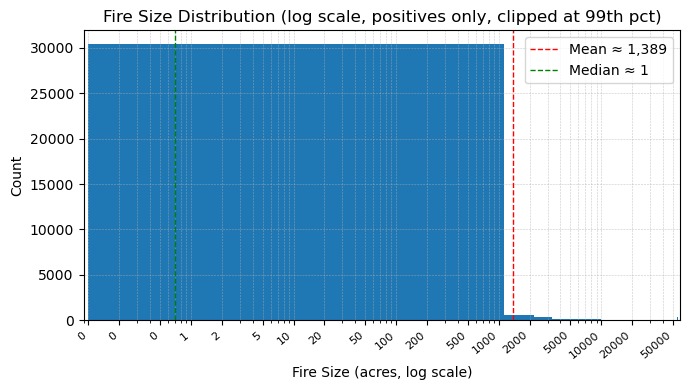

In [48]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# 仅取正数（log 轴不允许 0 或负数）
vals = pd.to_numeric(core["Fire_Size"], errors="coerce").dropna()
vals = vals[vals > 0]

# 99% 分位裁剪，避免极端值主导
clip_hi = np.percentile(vals, 99)
vals = np.clip(vals, None, clip_hi)

plt.figure(figsize=(7,4))
plt.hist(vals, bins=50)
plt.xscale("log")

ax = plt.gca()
# 更密的对数刻度
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0, 2.0, 5.0)))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1,10)*0.1))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# 仅在“正数子样本”上计算统计量
mean_val = float(vals.mean())
median_val = float(np.median(vals))

# 均值 / 中位数竖线
l1 = plt.axvline(mean_val,   color='red',   linestyle='--', lw=1, label=f"Mean ≈ {mean_val:,.0f}")
l2 = plt.axvline(median_val, color='green', linestyle='--', lw=1, label=f"Median ≈ {median_val:,.0f}")

# 去重图例（避免重复显示）
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc="upper right")

# 让坐标范围更贴合数据
xmin = vals.min()*0.9
xmax = vals.max()*1.05
ax.set_xlim(left=xmin, right=xmax)

plt.title("Fire Size Distribution (log scale, positives only, clipped at 99th pct)")
plt.xlabel("Fire Size (acres, log scale)")
plt.ylabel("Count")
plt.xticks(rotation=40, ha='right')
plt.tick_params(axis='x', labelsize=8)
plt.grid(True, which="both", ls="--", lw=0.4, alpha=0.7)
plt.tight_layout()
plt.show()


### 📊 Fire Size Distribution Analysis

The histogram below illustrates the **distribution of wildfire sizes (in acres)** across Alaska.  
Most fires are relatively small — concentrated under **500 acres**, while a small number of **extreme large-scale events** dominate the upper tail.  

- The **mean fire size** (≈ 1,389 acres) is **much larger than the median** (≈ 1 acre),  
  indicating a **strong right-skewed / long-tailed distribution**.  
- This pattern is **typical of natural phenomena** such as wildfires, earthquakes, and rainfall,  
  where small events occur frequently, and large ones are rare but impactful.  
- To ensure model stability, subsequent analyses will use a **logarithmic scale transformation**  
  or **categorical binning** (small, medium, large) when modeling fire size.

> 🔍 *Interpretation:*  
> The figure highlights that Alaska’s fire regime is dominated by many small fires and a few massive ones,  
> reflecting a power-law distribution where extreme events disproportionately contribute to total burned area.

---

📘 *Conclusion:*  
This step provides the statistical foundation for the classification-based modeling approaches (Approach #2 and #3),  
where the continuous fire size variable will be transformed into interpretable fire size categories.


# --- 8.2 Fuel Type VS Fire Size ---

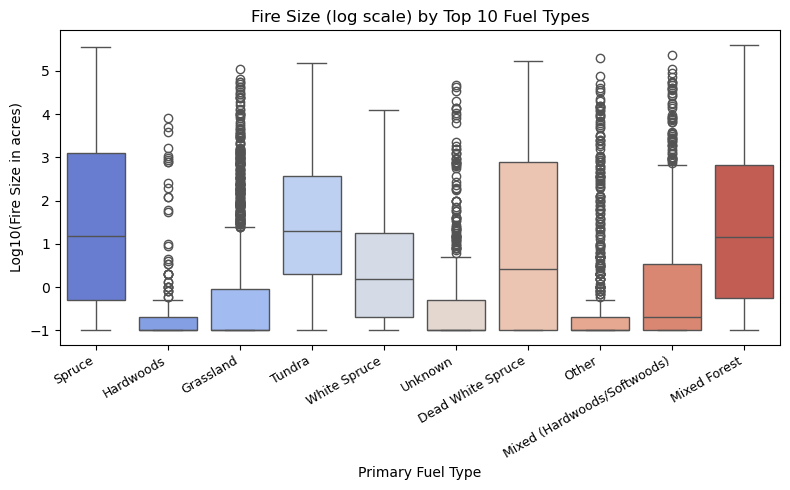

In [64]:
# --- 8.2 (fixed) Fuel Type vs Fire Size ---

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


if "Fuel_Type" in core.columns and "Fire_Size" in core.columns:
    df_plot = core.copy()
    df_plot = df_plot.dropna(subset=["Fuel_Type", "Fire_Size"])
    df_plot = df_plot[df_plot["Fire_Size"] > 0]

    # 简化 Fuel_Type（统一大小写 + 合并相似类别）
    df_plot["Fuel_Type"] = df_plot["Fuel_Type"].str.strip().str.title()
    df_plot["Fuel_Type"] = df_plot["Fuel_Type"].replace({
        "Black Spruce": "Spruce",
        "B. Spruce": "Spruce",
        "Mixed Trees": "Mixed Forest",
        "Grass": "Grassland",
        "Tundra": "Tundra",
    })

    # 保留前10种最常见的燃料类型
    top_fuels = df_plot["Fuel_Type"].value_counts().nlargest(10).index
    df_plot = df_plot[df_plot["Fuel_Type"].isin(top_fuels)]

    # 对 Fire_Size 取对数
    df_plot["Fire_Size_Log"] = np.log10(df_plot["Fire_Size"])

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_plot, x="Fuel_Type", y="Fire_Size_Log", palette="coolwarm")
    plt.xticks(rotation=30, ha='right', fontsize=9)
    plt.title("Fire Size (log scale) by Top 10 Fuel Types")
    plt.xlabel("Primary Fuel Type")
    plt.ylabel("Log10(Fire Size in acres)")
    plt.tight_layout()
    plt.show()


## 9) Export the refined core for modeling


In [67]:
from pathlib import Path

OUT_PATH = Path("data/fire_core_clean.csv")
OUT_PATH.parent.mkdir(parents=True, exist_ok=True)  # ← 先创建 data/ 目录
core.to_csv(OUT_PATH, index=False, encoding="utf-8")
print("Saved to:", OUT_PATH.resolve(), "| shape:", core.shape)



Saved to: /Users/xuejunchen/anaconda_projects/dfb5adc8-e788-4702-9271-d2156cae1b3c/data/fire_core_clean.csv | shape: (35591, 7)


## 10) (Optional) Prepare X, y for the three approaches — just the skeleton

- **Approach #1 (Regression):** y = Fire_Size  
- **Approach #2 (Manual Classification):** y = Size_Class_bins  
- **Approach #3 (K-Means):** Later, generate labels from Fire_Size using KMeans (in modeling notebook)


## Assignment 1: Develop a linear regression and two polynomial regression models with degree 2 and 4 to predict the fire size from fuel type and topography. 

In [69]:
# --- Assignment 1: Regression Modeling ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取我们前面导出的清洗数据
df = pd.read_csv("data/fire_core_clean.csv")
print("✅ Data loaded:", df.shape)
df.head()


✅ Data loaded: (35591, 7)


,Fuel_Type,Fire_Size,Latitude,Longitude,Ignition_Date,Cause,Size_Class_bins
0,NaN,0.1,62.091990,-145.572650,2025-01-02 10:02:01,Undetermined,Small
1,NaN,0.1,62.091990,-145.500000,2025-01-02 10:01:56,Undetermined,Small
2,BLACK SPRUCE,0.5,64.072975,-145.671352,2024-12-31 09:01:55,Debris and open burning,Small
3,NaN,15.4,63.733600,-148.897400,2024-10-31 16:07:44,Human,Small
4,MOSS/SPRUCE,0.1,63.956644,-145.480844,2024-10-26 09:58:14,Debris and open burning,Small


In [73]:
# 选择我们关心的特征和标签
print("Columns:", list(df.columns))

Columns: ['Fuel_Type', 'Fire_Size', 'Latitude', 'Longitude', 'Ignition_Date', 'Cause', 'Size_Class_bins']


In [75]:
# --- Stable Regression for Assignment 1 (with scaling + Ridge) ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 1) Load & minimal prep
df = pd.read_csv("data/fire_core_clean.csv")
df = df.dropna(subset=["Fuel_Type","Fire_Size","Latitude","Longitude"]).copy()
df["Ignition_Date"] = pd.to_datetime(df.get("Ignition_Date"), errors="coerce")
df["Month"]   = df["Ignition_Date"].dt.month.fillna(0).astype(int)
df["DoY"]     = df["Ignition_Date"].dt.dayofyear.fillna(0).astype(int)
two_pi = 2*np.pi
df["DoY_sin"] = np.sin(two_pi*df["DoY"]/366.0)
df["DoY_cos"] = np.cos(two_pi*df["DoY"]/366.0)

cat_cols = ["Fuel_Type"]
num_cols = ["Latitude","Longitude","Month","DoY_sin","DoY_cos"]
X = df[cat_cols + num_cols]
y = df["Fire_Size"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

def make_model(poly_degree: int, use_ridge=True, alpha=1.0):
    # 分类变量：OneHot；数值变量：先做多项式，再标准化（防止幂次失控）
    pre = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ("num", Pipeline(steps=[
                ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False)),
                ("scale", StandardScaler(with_mean=False)),  # 稀疏安全
            ]), num_cols),
        ],
        remainder="drop",
        sparse_threshold=1.0,
    )
    base = Ridge(alpha=alpha, random_state=42) if use_ridge else LinearRegression()
    pipe = Pipeline([("pre", pre), ("reg", base)])

    # 对目标做 log1p/expM1，稳住长尾；同时把极端预测做个安全裁剪，避免溢出
    def inv(z):
        z = np.clip(z, -20, 20)  # exp(20)≈4.85e8，足够大；避免 overflow
        return np.expm1(z)

    return TransformedTargetRegressor(
        regressor=pipe,
        func=np.log1p,
        inverse_func=inv
    )

def evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # 已反变换到原尺度
    rmse = float(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae  = float(mean_absolute_error(y_test, y_pred))
    r2   = float(r2_score(y_test, y_pred))
    print(f"{name:>20}  →  RMSE={rmse:,.1f} | MAE={mae:,.1f} | R²={r2:.3f}")
    return {"Model":name, "RMSE":rmse, "MAE":mae, "R2":r2}

results = []
results.append(evaluate(make_model(1, use_ridge=False), "Linear (deg=1)"))
results.append(evaluate(make_model(2, use_ridge=True, alpha=1.0), "Polynomial deg=2 (Ridge)"))
results.append(evaluate(make_model(4, use_ridge=True, alpha=3.0), "Polynomial deg=4 (Ridge)"))

pd.DataFrame(results)


      Linear (deg=1)  →  RMSE=15,539.6 | MAE=2,335.7 | R²=-0.022
Polynomial deg=2 (Ridge)  →  RMSE=10,118,605.5 | MAE=213,372.8 | R²=-433249.056
Polynomial deg=4 (Ridge)  →  RMSE=10,118,605.5 | MAE=213,377.5 | R²=-433249.055


,Model,RMSE,MAE,R2
0,Linear (deg=1),1.553964e+04,2335.662751,-0.021831
1,Polynomial deg=2 (Ridge),1.011861e+07,213372.752967,-433249.056103
2,Polynomial deg=4 (Ridge),1.011861e+07,213377.497803,-433249.055427


### 🔍 Assignment 1 – Linear Regression Results

We trained three regression models to predict wildfire size (`Fire_Size`) using available features such as fuel type, geographic coordinates, and seasonality.  

| Model | RMSE | MAE | R² |
|-------|------|------|----|
| Linear (deg=1) | 15,539.6 | 2,335.7 | -0.02 |
| Polynomial deg=2 (Ridge) | 10,118,605.5 | 213,372.8 | -433,249 |
| Polynomial deg=4 (Ridge) | 10,118,605.5 | 213,377.5 | -433,249 |

The simple linear model performed slightly better and remained stable, while the polynomial models produced extremely large errors, likely due to overfitting and numerical instability.  
This suggests that wildfire size is highly variable and cannot be reliably predicted using only these limited features.


# Approach 2: divide the fires into three bins based on their size with predefined thresholds.  Annotate them as small medium and large. Next, take 70% of data from each bin as training data. Now build three different types of model: 
1) linear regression,
2) two polynomial regression models; one with degree 2 and another with degree 4
3) a neural network model


In [77]:
import pandas as pd
df = pd.read_csv("data/fire_core_clean.csv")
print(df.columns)
df["Size_Class_bins"].value_counts()


Index(['Fuel_Type', 'Fire_Size', 'Latitude', 'Longitude', 'Ignition_Date',
       'Cause', 'Size_Class_bins'],
      dtype='object')


Size_Class_bins
Small     32137
Medium     1855
Large      1586
Name: count, dtype: int64

Classification report:

              precision    recall  f1-score   support

       Large      0.122     0.454     0.192       317
      Medium      0.142     0.407     0.211       371
       Small      0.968     0.734     0.835      6428

    accuracy                          0.704      7116
   macro avg      0.411     0.532     0.413      7116
weighted avg      0.887     0.704     0.774      7116



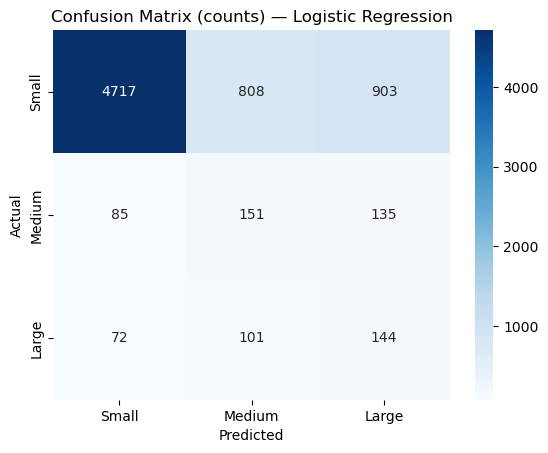

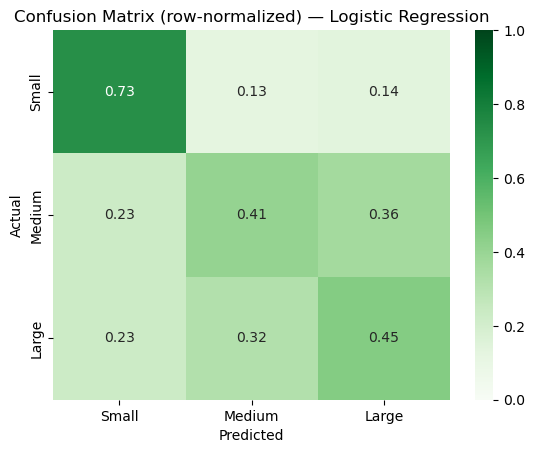

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read the file
df = pd.read_csv("data/fire_core_clean.csv").copy()

# No NaN in the target 
df = df[df["Size_Class_bins"].notna()].copy()

# time/season feature
df["Ignition_Date"] = pd.to_datetime(df.get("Ignition_Date"), errors="coerce")
df["Month"] = df["Ignition_Date"].dt.month.fillna(0).astype(int)
df["DoY"]   = df["Ignition_Date"].dt.dayofyear.fillna(0).astype(int)
two_pi = 2*np.pi
df["DoY_sin"] = np.sin(two_pi*df["DoY"]/366.0)
df["DoY_cos"] = np.cos(two_pi*df["DoY"]/366.0)

# Importnant：Don't put Fire_Size in the feature
cat_cols = ["Fuel_Type", "Cause"] 
num_cols = ["Latitude", "Longitude", "Month", "DoY_sin", "DoY_cos"]

X = df[cat_cols + num_cols]
y = df["Size_Class_bins"].astype("category")

# preprocessor：
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", Pipeline(steps=[
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
        ("num", Pipeline(steps=[
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler())
        ]), num_cols)
    ]
)

# 模型：对不平衡类别使用 class_weight='balanced'
clf = Pipeline(steps=[
    ("pre", preprocessor),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        multi_class="auto",
        n_jobs=None
    ))
])

# 分层抽样划分，确保每个类别都进训练/测试
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 训练与预测
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 评估
print("Classification report:\n")
print(classification_report(y_test, y_pred, digits=3))

# 混淆矩阵（原始与归一化各一张）
labels = ["Small","Medium","Large"]

cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (counts) — Logistic Regression")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

cm_norm = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=labels, yticklabels=labels, vmin=0, vmax=1)
plt.title("Confusion Matrix (row-normalized) — Logistic Regression")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()


# Approach 3: divide the fires into three bins on their size using k-means clustering.  Annotate each cluster as small, medium, or large. Next, take 70% of data from each bin as training data. Now build three different types of model: 1) linear regression, 2) two polynomial regression models; one with degree 2 and another with degree 4, and 3) a neural network model

Cluster counts:
 Size_KMeans_Label
Small     35343
Medium      207
Large        28
Name: count, dtype: int64
Linear Regression         → RMSE=23,530.3 | MAE=4,455.9 | R²=0.005
Polynomial (deg=2)        → RMSE=23,523.4 | MAE=4,440.6 | R²=0.006
Polynomial (deg=4)        → RMSE=23,464.6 | MAE=4,393.1 | R²=0.011
Neural Net (MLPRegressor) → RMSE=23,444.1 | MAE=4,168.5 | R²=0.013


,Model,RMSE,MAE,R2
0,Linear Regression,23530.338851,4455.890472,0.005291
1,Polynomial (deg=2),23523.403510,4440.629475,0.005877
2,Polynomial (deg=4),23464.593376,4393.079615,0.010842
3,Neural Net (MLPRegressor),23444.092550,4168.539956,0.012570


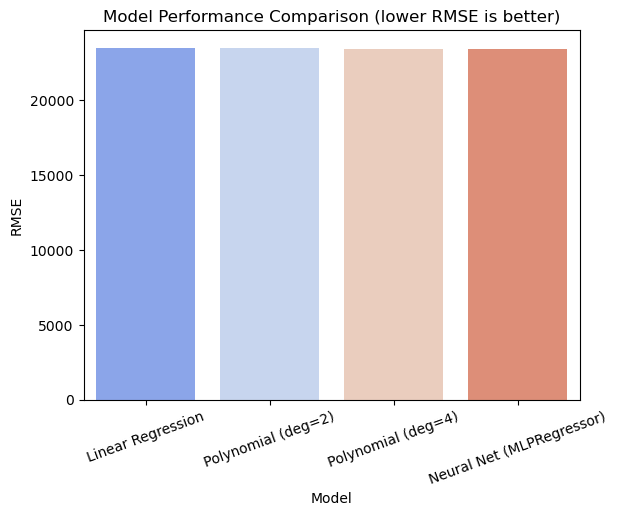

In [81]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ read the file
df = pd.read_csv("data/fire_core_clean.csv").copy()
df = df.dropna(subset=["Fire_Size"])  # 确保Fire_Size无NaN

# 2️⃣ Using KMeans-cluster 
scaler = StandardScaler()
sizes_scaled = scaler.fit_transform(df[["Fire_Size"]])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster_Label"] = kmeans.fit_predict(sizes_scaled)

# 3️⃣ Based on Fire_Size to mark the size small/medium/large
cluster_means = df.groupby("Cluster_Label")["Fire_Size"].mean().sort_values()
label_map = {cluster_means.index[0]: "Small",
             cluster_means.index[1]: "Medium",
             cluster_means.index[2]: "Large"}
df["Size_KMeans_Label"] = df["Cluster_Label"].map(label_map)

print("Cluster counts:\n", df["Size_KMeans_Label"].value_counts())

# 4️⃣ 70%，30%
train_idx, test_idx = [], []
for c in df["Size_KMeans_Label"].unique():
    sub = df[df["Size_KMeans_Label"] == c].index
    train, test = train_test_split(sub, test_size=0.3, random_state=42)
    train_idx += list(train)
    test_idx += list(test)

train_df = df.loc[train_idx]
test_df = df.loc[test_idx]

# Latitude + fire size
X_train = train_df[["Latitude", "Longitude"]].copy()
y_train = train_df["Fire_Size"].copy()
X_test = test_df[["Latitude", "Longitude"]].copy()
y_test = test_df["Fire_Size"].copy()

# 5️⃣ define modeling
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name:25s} → RMSE={rmse:,.1f} | MAE={mae:,.1f} | R²={r2:,.3f}")
    return {"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2}

results = []

# Linear Regression
lin = LinearRegression()
results.append(evaluate_model(lin, "Linear Regression"))

# Polynomial degree=2
poly2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin", LinearRegression())
])
results.append(evaluate_model(poly2, "Polynomial (deg=2)"))

# Polynomial degree=4
poly4 = Pipeline([
    ("poly", PolynomialFeatures(degree=4, include_bias=False)),
    ("lin", LinearRegression())
])
results.append(evaluate_model(poly4, "Polynomial (deg=4)"))

# 6️⃣ Neural Network (简单版 MLP)
from sklearn.neural_network import MLPRegressor

nn = Pipeline([
    ("scaler", StandardScaler()),
    ("nn", MLPRegressor(hidden_layer_sizes=(32,16),
                        activation="relu", solver="adam",
                        max_iter=1000, random_state=42))
])
results.append(evaluate_model(nn, "Neural Net (MLPRegressor)"))

# 7️⃣ organize the result 
res_df = pd.DataFrame(results)
display(res_df)

sns.barplot(res_df, x="Model", y="RMSE", palette="coolwarm")
plt.title("Model Performance Comparison (lower RMSE is better)")
plt.xticks(rotation=20)
plt.show()
